In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.2/721.2 kB 8.6 MB/s eta 0:00:00


In [2]:
## importing required libraries
import os
import shutil
import random

!pip install tqdm --upgrade
from tqdm.notebook import tqdm

In [3]:
train_path_img = "./content/drive/MyDrive/AA_Cricket_data/train/images/"
train_path_label = "./content/drive/MyDrive/AA_Cricket_data/train/labels/"
val_path_img = "./content/drive/MyDrive/AA_Cricket_data/valid/images/"
val_path_label = "./content/drive/MyDrive/AA_Cricket_data/valid/labels/"
test_path = "./content/drive/MyDrive/AA_Cricket_data/test/images/"

In [ ]:
'''
Split the dataset into train and test and creates the train.txt and test.tx with
the respective path of the images in each folder
'''

def train_test_split(path,neg_path=None, split = 0.2):
    print("------ PROCESS STARTED -------")


    files = list(set([name[:-4] for name in os.listdir(path)])) ## removing duplicate names i.e. counting only number of images


    print (f"--- This folder has a total number of {len(files)} images---")
    random.seed(42)
    random.shuffle(files)

    test_size = int(len(files) * split)
    train_size = len(files) - test_size

    ## creating required directories

    os.makedirs(train_path_img, exist_ok = True)
    os.makedirs(train_path_label, exist_ok = True)
    os.makedirs(val_path_img, exist_ok = True)
    os.makedirs(val_path_label, exist_ok = True)


    ### ----------- copying images to train folder
    for filex in tqdm(files[:train_size]):
      if filex == 'classes':
          continue
      shutil.copy2(path + filex + '.jpg',f"{train_path_img}/" + filex + '.jpg' )
      shutil.copy2(path + filex + '.txt', f"{train_path_label}/" + filex + '.txt')



    print(f"------ Training data created with 80% split {len(files[:train_size])} images -------")

    if neg_path:
        neg_images = list(set([name[:-4] for name in os.listdir(neg_path)])) ## removing duplicate names i.e. counting only number of images
        for filex in tqdm(neg_images):
            shutil.copy2(neg_path+filex+ ".jpg", f"{train_path_img}/" + filex + '.jpg')

        print(f"------ Total  {len(neg_images)} negative images added to the training data -------")

        print(f"------ TOTAL Training data created with {len(files[:train_size]) + len(neg_images)} images -------")



    ### copytin images to validation folder
    for filex in tqdm(files[train_size:]):
      if filex == 'classes':
          continue
      # print("running")
      shutil.copy2(path + filex + '.jpg', f"{val_path_img}/" + filex + '.jpg' )
      shutil.copy2(path + filex + '.txt', f"{val_path_label}/" + filex + '.txt')

    print(f"------ Testing data created with a total of {len(files[train_size:])} images ----------")

    print("------ TASK COMPLETED -------")


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/AA_Cricket_data/dataset.yaml epochs=10 imgsz=640 batch=8 project=/content/drive/MyDrive/AA_Cricket_data/training_results name=bat


100% 21.5M/21.5M [00:00<00:00, 156MB/s]
Ultralytics YOLOv8.1.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/AA_Cricket_data/dataset.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/AA_Cricket_data/training_results, name=bat2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fals

In [9]:
# Import libraries
from ultralytics import YOLO

# Define model path (modify as needed)
model_path = "/content/drive/MyDrive/AA_Cricket_data/training_results/bat/weights/last.pt"

# Load the model
model = YOLO(model_path)

# Define image path (modify as needed)
image_path = "/content/drive/MyDrive/Picture1.png"

# Perform detection
results = model(image_path)




image 1/1 /content/drive/MyDrive/Picture1.png: 448x640 3 cricket_bats, 486.0ms
Speed: 3.2ms preprocess, 486.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


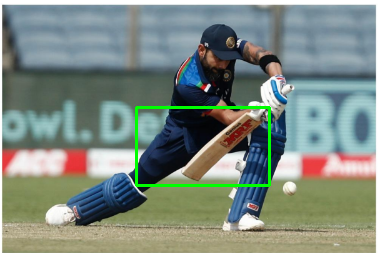

In [12]:
import cv2
from google.colab.patches import cv2_imshow
# Load the image
image = cv2.imread(image_path)

# Iterate over each set of detection results in the list
for result in results:
    # Extract bounding box information from the 'boxes' attribute
    boxes = result.boxes[0]

    # Iterate over the bounding boxes
    for box in boxes:
        # Extract bounding box coordinates
        x1, y1, x2, y2 = box.xyxy[0]

        # Draw bounding box on the image
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

# Display the image with bounding boxes
cv2_imshow(image)


[100 123 135]
[[47 66]]
[229 236 245]
[[115   4]]
[  0   0 255]
[[110   8]]


<ipython-input-13-dfa3733ffe3b>:28: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


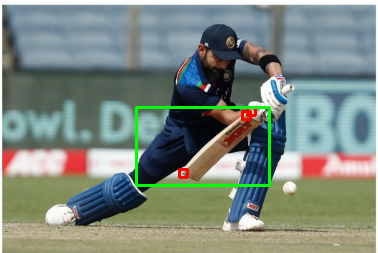

In [13]:

import cv2
import numpy as np

# Load the image
image = cv2.imread(image_path)
threshold_distance1 = 15
threshold_distance2 = 3
# Iterate over each set of detection results in the list
for result in results:
    # Extract bounding box information from the 'boxes' attribute
    boxes = result.boxes[0]

    # Iterate over the bounding boxes
    for box in boxes:
        # Extract bounding box coordinates
        x1, y1, x2, y2 = box.xyxy[0]

        # Extract the region of interest (ROI) within the bounding box
        roi = image[int(y1):int(y2), int(x1):int(x2)]

        # Convert the ROI to grayscale
        gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        height, width = gray_roi.shape[:2]
        # Perform corner detection on the grayscale ROI
        corners = cv2.goodFeaturesToTrack(gray_roi, maxCorners=30, qualityLevel=0.02, minDistance=5)
        #print(corners)
        if corners is not None:
            corners = np.int0(corners)

            # Draw bounding boxes around the detected corners
            for corner in corners:
                x, y = corner.ravel()
                color_values = roi[y, x]
                #print(color_values)
                if color_values[2] == max(color_values):
                    if x < threshold_distance1 or y < threshold_distance1 or x > width - threshold_distance1 or y > height - threshold_distance1:
                        if x > threshold_distance2 and y > threshold_distance2 and x < width - threshold_distance2 and y < height - threshold_distance2:
                            if abs(color_values[2] - color_values[0]) > 5 and abs(color_values[2] - color_values[1]) > 5:
                                cv2.rectangle(roi, (x - 4, y - 4), (x + 4, y + 4), (0, 0, 255), 2)
                                print(color_values)
                                print(corner)
        # Draw bounding box around the original bounding box
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

# Display the image with bounding boxes around corners
cv2_imshow(image)
